# Statystyka matematyczna - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu:
Członkowie:

---

# Zestaw zadań 7: Estymacja nieparametryczna

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity

In [ ]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Dane do zadań

W celu wygenerowania danych wykonaj poniższą komórkę.

In [3]:
# Dane do testów 1
sample = pd.DataFrame(data=np.concatenate([sp.stats.norm.rvs(loc=4, scale=0.2, size=45, random_state=7), sp.stats.norm.rvs(loc=5.5, scale=0.4, size=85, random_state=2159)]), columns=["X"])
sample.head()

,X
0,4.338105
1,3.906813
2,4.006564
3,4.081503
4,3.842215


### Zadanie 1: Histogram [5 pkt]

#### a) Przygotowanie wykresów

Korzystając z funkcji `seaborn.histplot()`przygotuj histogramy częstości zestawu danych zawartego w zmiennej `sample`.

Wykresy zestaw na pojedynczej figurze (2x3 pola na wykres). Przygotowując figurę kieruj się wytycznymi z początku notatnika. Podczas wykonywania kolejnych histogramów:
 - nie ustawiaj żadnych wartość określających podział na przedziały oraz granice przedziałów,
 - ustaw wyłącznie liczbę przedziałów na 20,
 - ustaw wyłącznie szerokość przedziałów na 0.3,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.05,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.15,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.4.
 
Do każdego z wykresów dodaj wizualną reprezentację zestawu danych w postaci zbioru symboli (| lub +) zlokalizowanych poniżej histogramu. Ustaw identyczne zakresy osi dla wszystkich wykresów.

<Axes: ylabel='Count'>

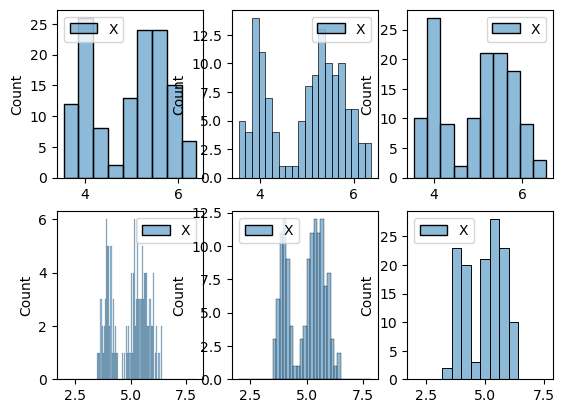

In [15]:
from warnings import filterwarnings
filterwarnings("ignore")
fig, axes = plt.subplots(2, 3)

# pierwszy histogram
sns.histplot(sample, ax=axes[0, 0])
# drugi histogram
sns.histplot(sample, bins=20, ax=axes[0, 1])
# trzeci histogram
sns.histplot(sample, binwidth=0.3, ax=axes[0, 2])
# czwarty histogram
sns.histplot(sample, bins=np.arange(2, 8, 0.05), ax=axes[1, 0])
# piaty histogram
sns.histplot(sample, bins=np.arange(2, 8, 0.15), ax=axes[1, 1])
# szosty histogram
sns.histplot(sample, bins=np.arange(2, 8, 0.4), ax=axes[1, 2])

### Zadanie 2: Estymacja funkcją jądrową [16 pkt]

#### a) Estymacji funkcjami jądrowymi od podstaw

Przygotuj funkcję `simple_kde_estimation()`, która będzie dokonywała estymacji nieparametrycznej metodą funkcji jądrowych z wykorzystaniem jądra w postaci rozkładu normalnego o odchyleniu normalnym $\sigma$ zgodnie z informacjami zawartymi w docstring funkcji oraz schematem z załączonego do notatnika zestawu wzorów.

Poza zwracaniem danych określonych w docstring funkcji powinna ona generować wykres zawierający wyestymowaną funkcję (wykres liniowy z wypełnionym polem pod krzywą) oraz dodaną wizualną reprezentacją zestawu danych w postaci zbioru symboli (| lub +) zlokalizowanych poniżej wykresu.

Uwagi do wykonania zadania:
 - Punkty estymacji wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości gęstości prawdopodobieństwa oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.norm`.
 - Przygotowując figurę kieruj się wytycznymi z początku notatnika.

In [20]:
def simple_kde_estimation(data, estimation_points, sigma):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i pojedynczą kolumnę "X" z wartościami próby losowej.
    estimation_points: int
        Liczba punktów estymacji funkcji gęstości prawdopodobieństwa.
    sigma: float
        Odchylenie standardowe rozkładu normalnego wykorzystywanego jako jądro funkcji.
    
    Returns
    -------
    cdf: DataFrame
        Tablica zawierająca następujące kolumny:
        X - uszeregowane rosnąco punkty estymacji funkcji gęstości prawdopodobieństwa,
        KDE - wyestymowane wartości funkcji gęstości prawdopodobieństwa.
    """
    # Pierwszy krok
    x_min = data['X'].min()
    x_max = data['X'].max()
    
    # Punkty z drugiego kroku
    x_values = np.linspace(x_min - 3 * sigma, x_max + 3 * sigma, estimation_points)
    
    kde_values = []
    for x in x_values:
        # trzeci krok
        f_value = sum(sp.stats.norm.pdf((x - data['X']) / sigma))
        kde_values.append(f_value)

    # czwarty krok
    f_sum = sum(kde_values)
    d = x_values[1] - x_values[0]
    kde_values = [value / (f_sum * d) for value in kde_values]
    
    cdf = pd.DataFrame({'X': x_values, 'KDE': kde_values})
    
    # wykres
    plt.plot(cdf['X'], cdf['KDE'], label='KDE')
    plt.fill_between(cdf['X'], cdf['KDE'], color='skyblue', alpha=0.5)
    plt.scatter(data['X'], np.zeros_like(data['X']), marker='|', color='black', label='Data')
    plt.xlabel('Punkty')
    plt.ylabel('Gęstość')
    plt.legend()
    plt.title('Estymacja funckją jądrową')
    plt.show()
    
    return cdf


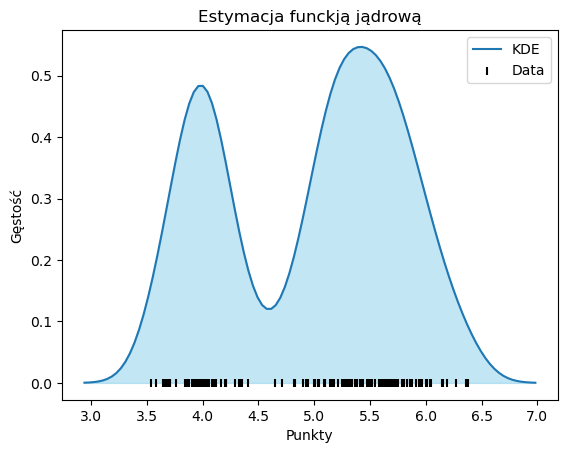

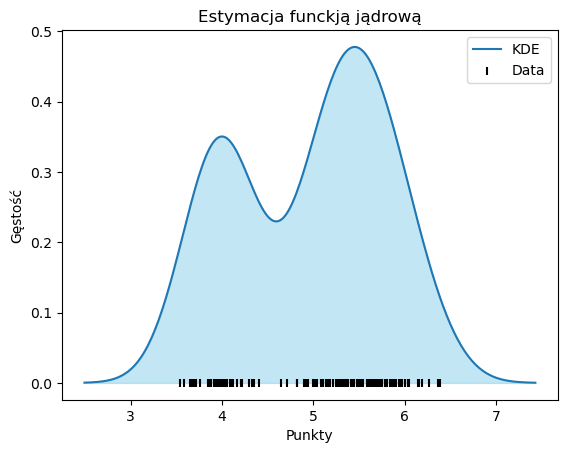

In [21]:
# Komórka testowa
test_results_1 = simple_kde_estimation(sample, estimation_points=100, sigma=0.2)
assert type(test_results_1) == pd.DataFrame
assert test_results_1.shape == (100, 2)
assert list(test_results_1.columns) == ['X', 'KDE']
assert np.all(np.isclose(test_results_1.min().values, [2.94233698e+00, 3.32813073e-04]))
assert np.all(np.isclose(test_results_1.max().values, [6.98176057, 0.54688772]))
assert np.all(np.isclose(test_results_1.mean().values, [4.96204877, 0.24508447]))

test_results_2 = simple_kde_estimation(sample, estimation_points=250, sigma=0.35)
assert type(test_results_2) == pd.DataFrame
assert test_results_2.shape == (250, 2)
assert list(test_results_2.columns) == ['X', 'KDE']
assert np.all(np.isclose(test_results_2.min().values, [2.49233698e+00, 2.69768435e-04]))
assert np.all(np.isclose(test_results_2.max().values, [7.43176057, 0.47782523]))
assert np.all(np.isclose(test_results_2.mean().values, [4.96204877, 0.20164296]))

#### b) Dedykowane funkcje

Korzystając z klasy `KernelDensity` wchodzącej w skład pakietu scikit-learn dokonaj estymymacji rozkładu zestawu danych zawartego w zmiennej `sample`.

Wyniki estymacji przedstaw w postaci wykresów zawierających wyestymowaną funkcję (wykres liniowy z wypełnionym polem pod krzywą) oraz dodaną wizualną reprezentacją zestawu danych w postaci pionowych kresek zlokalizowanych poniżej wykresu.

Wykresy zestaw na dwóch figurach (2x3 pola na wykres). Przygotowując figury kieruj się wytycznymi z początku notatnika. Podczas wykonywania wykresów:
 - Figura 1:
     - na każdym z wykresów przedstaw wynik estymacji z wykorzystaniem innego jądra funkcji,
     - ustaw wartość parametru odpowiadającego za szerokość jądra funkcji na 0.1,
     - ustaw identyczne zakresy osi dla wszystkich wykresów.
 - Figura 2:
     - na każdym z wykresów przedstaw wynik estymacji z wykorzystaniem innego jądra funkcji,
     - ustaw wartość parametru odpowiadającego za szerokość jądra funkcji tak, aby wynik pracy funkcji dobrze oddawał charakter rozkładu populacji z której została pobrana próba losowa,
     - ustaw identyczne zakresy osi dla wszystkich wykresów. 

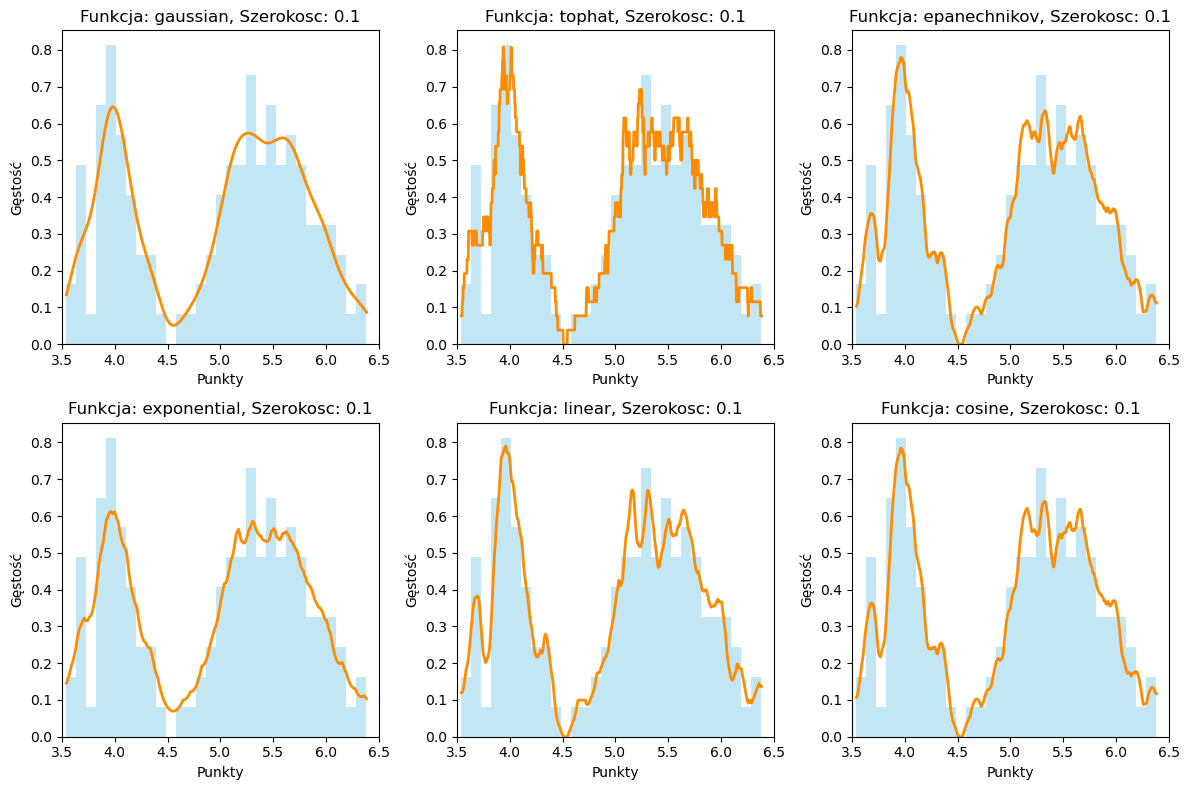

In [55]:
from warnings import filterwarnings
filterwarnings("ignore")

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html
# z uwagi na liczne powtorki i zachowanie mimo wszystko zasady DRY funkcja generujaca wykres
def generate_plot(data: pd.DataFrame, fn: str, width: float, figure_index: int):
    kde = KernelDensity(kernel=fn, bandwidth=width)
    kde.fit(sample)

    points = np.linspace(min(data.values), max(data.values), 1000)
    # logarytm gestosci
    log_dens = kde.score_samples(points.reshape(-1, 1))

    # Tworzenie wykresu
    plt.subplot(2, 3, figure_index)
    # niwelujemy logarytm
    plt.plot(points, np.exp(log_dens), color='darkorange', lw=2, label='KDE')
    # histogram pod linie KDE
    plt.hist(sample, bins=30, density=True, alpha=0.5, color='skyblue')
    plt.xlim([3.5, 6.5])
    # labele
    plt.title(f'Funkcja: {fn}, Szerokosc: {width:.1f}')
    plt.xlabel('Punkty')
    plt.ylabel('Gęstość')
    

# dostepne funkcje jadra
funkcje = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
szerokosci = [0.1] * len(funkcje)

# figura 1 
plt.figure(figsize=(12, 8))
for ind, (fn, szer) in enumerate(zip(funkcje, szerokosci), 1):
    # index od jedynki dla subplota
    generate_plot(sample, fn, szer, ind)
# dodajemy padding dla lepszej widocznosci
plt.tight_layout()
plt.show()

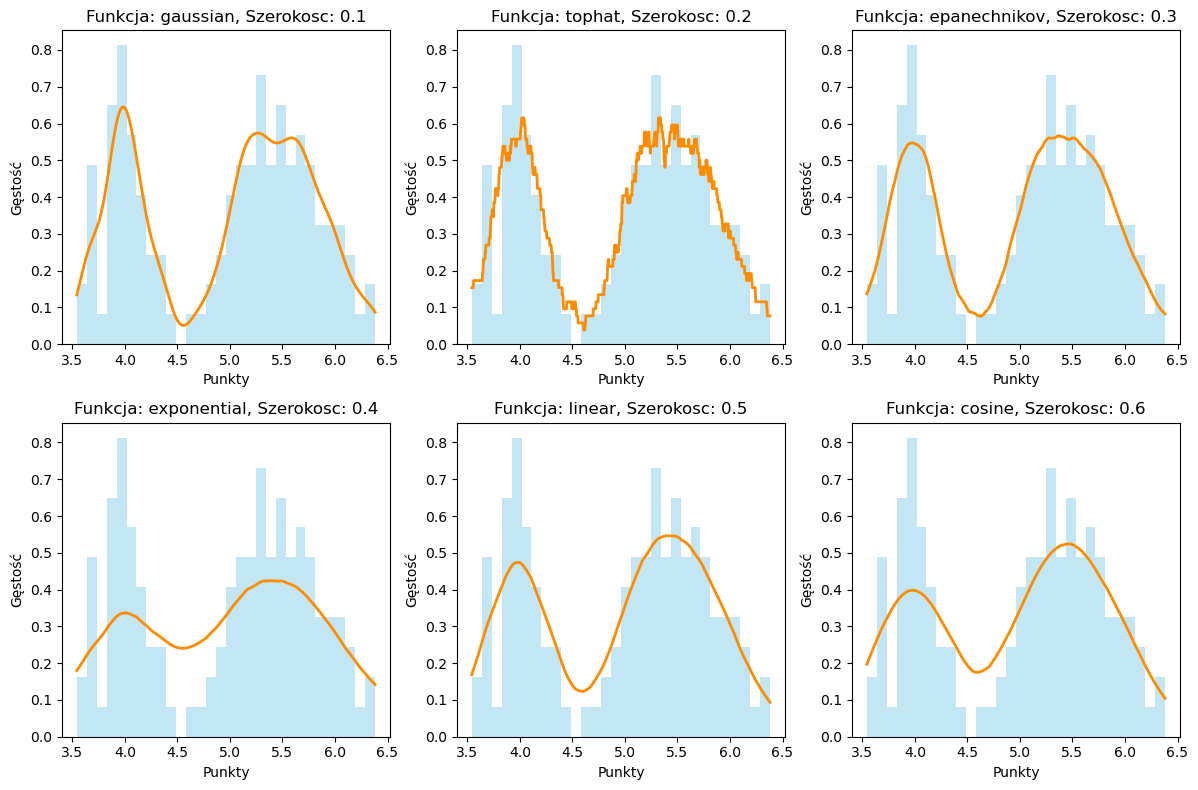

In [54]:
szerokosci2 = np.linspace(0.1, len(functions) / 10, len(functions))

# figura 2 
plt.figure(figsize=(12, 8))
for ind, (fn, szer) in enumerate(zip(funkcje, szerokosci2), 1):
    # index od jedynki dla subplota
    generate_plot(sample, fn, szer, ind)
# dodajemy padding dla lepszej widocznosci
plt.tight_layout()
plt.show()

### Zadanie 3: Dyskusja wyników [6 pkt]

Przygotowane w poprzednich zadaniach wykresy są wizualną reprezentacją tego samego zestawu danych, dobór metody oraz jej parametrów sparawia jednak, że nie wyglądają one identycznie.

Przedyskutuj plusy i minusy obu metod oraz odpowiedz na pytanie w jaki sposób dobór parametrów funkcji (liczba, szerokość i położenie granic przedziałów, wykorzystana wersja oraz szerokość jadra) wpływa na poprawność i czytelność wyniku.

Pierwszą różnicą pomiędzy innymi szerokościami jest ukazanie "szczegółów", widać to np. bardzo dobrze dla funckji "tophat", gdzie dla mniejszej szerokości widzimy więcej nagłych skoków wartości i ich zmian. Natomiast dla takiej funckji Gaussa różnice pomiędzy szerokościami jąder 0.1 i 0.2 są minimalne. 
Dodatkową i bardzo ważną obserwacją jest to, że wraz ze wzrostem szerokości przedziałów tracimy szczegóły/informacje płynące z takiego wykresu typu KDE, przykładem jest funckja "cosine", gdzie z prawie, że dokładnego dopasowania do histogramu mamy bardzo ogólne dopasowanie. Ma to swoje plusy - lepsza wydajność i przejrzystość przy dużej ilości danych oraz lepsza generalizacja trendów w danych, ale także minusy - tracenie szczegółów, brak/utrudnione wydobywanie szczegółów z danych. 
Jeśli chodzi o dobór metod, to najbardziej "szczegółową jest moim zdaniem metoda 'top hat', a najmniej Gaussa", metody te są stosowane w innych przypadkach, gdy chcemy ukazać szczegóły i zmiany w danych - wybieramy metody takie jak "top hat", czy "linear", a gdy bardziej generalny obraz danych mamy metody takie jak np. "gaussian", bądź "exponential".

Jeśli chodzi o porównanie wyników histogramu i KDE, to warto zauważyć na początku jaką wartość wnosi ich wspolne używanie. Plusami histogramu jest większy wgląd w dane, oraz większa widoczność zmian w danych. Pokazuje nam to też poszczególne przedziały wartości w przeciwieństwie do ciagłej postaci KDE. Jeśli chodzi o KDE właśnie to pokazuje nam lepiej ciągłość danych i ogólne trendy, bez większego wchodzenia w szczegóły, co jest dobre do wyciągania ogólnych obserwacji, co do rozłożenia danych.

Jeśli chodzi o różnice w zmianach szerokości jąder i przedziałów, zmiany w jądrach na podobnym poziomie prowadzą moim zdaniem do większej generalizacji. Aczkolwiek w obu przypadkach generalizacja znacznie się zwiększa i jest coraz bardziej widoczna, co również pokazuje powiązanie między tymi typami wykresów.

### Zadanie 4: Estymacja na podstawie dystybuanty [8 pkt]

Przygotuj funkcję `cdf_estimation()`, która będzie dokonywała estymacji dystrybuanty rozkładu w oparciu o dystrybuantę empiryczną oraz statystykę wyznaczaną z rozkładu Kołmogorowa-Smirnowa zgodnie z informacjami zawartymi w docstring funkcji oraz schematem z załączonego do notatnika zestawu wzorów.

Poza zwracaniem danych określonych w docstring funkcji powinna ona generować wykres liniowy dystrybuanty empirycznej z zaznaczonym przedziałem ufności oraz tytułem figury `Przedział ufności dystrybuanty rozkładu na poziomie istotności 1-alpha=A`, gdzie wartość A jest uzupełnianie na podstawie wartości argumentu `alpha`.

Uwagi do wykonania zadania:
 - Wartości statystyki testowej oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.kstwo`.

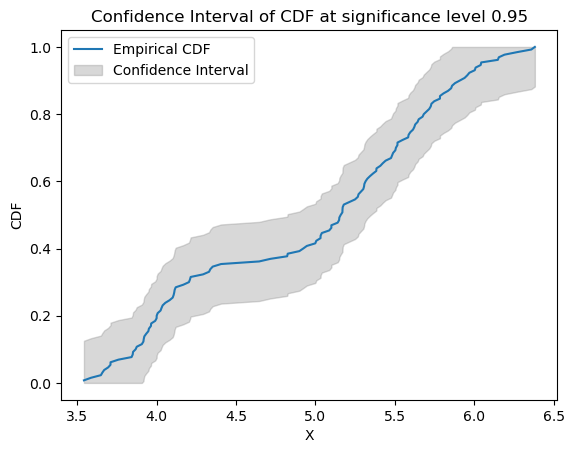

,X,F_d,F_d_min,F_d_max
0,3.542337,0.007692,0.000000,0.125445
1,3.587117,0.015385,0.000000,0.133138
2,3.649055,0.023077,0.000000,0.140830
3,3.658332,0.030769,0.000000,0.148522
4,3.669785,0.038462,0.000000,0.156215
...,...,...,...,...
125,6.154922,0.969231,0.851478,1.000000
126,6.190435,0.976923,0.859170,1.000000
127,6.271357,0.984615,0.866862,1.000000
128,6.359798,0.992308,0.874555,1.000000


In [117]:
def cdf_estimation(data, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i pojedynczą kolumnę "X" z wartościami próby losowej.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    cdf: DataFrame
        Tablica zawierająca następujące kolumny:
        X - uszeregowane rosnąco wartości próby losowej,
        F_d - wartości dystrybuanty empirycznej,
        F_d_min - dolna granica przedziału ufności,
        F_d_max - górna granica przedziału ufności.
    """
    sorted_data = np.sort(data["X"])
    n = len(sorted_data)
    cdf_empirical = np.arange(1, n + 1) / n
    
    ks_statistic = sp.stats.kstwo.ppf(1 - alpha, n)
    
    cdf_min = np.maximum(0, cdf_empirical - ks_statistic)
    cdf_max = np.minimum(1, cdf_empirical + ks_statistic)

    cdf = pd.DataFrame({"X": sorted_data, "F_d": cdf_empirical, "F_d_min": cdf_min, "F_d_max": cdf_max})

    plt.plot(cdf["X"], cdf["F_d"], label="Empirical CDF")
    plt.fill_between(cdf["X"], cdf["F_d_min"], cdf["F_d_max"], color="grey", alpha=0.3, label="Confidence Interval")
    plt.xlabel("X")
    plt.ylabel("CDF")
    plt.title(f"Confidence Interval of CDF at significance level {1 - alpha}")
    plt.legend()
    plt.show()
    
    return cdf

cdf_results = cdf_estimation(sample, 0.05)
cdf_results

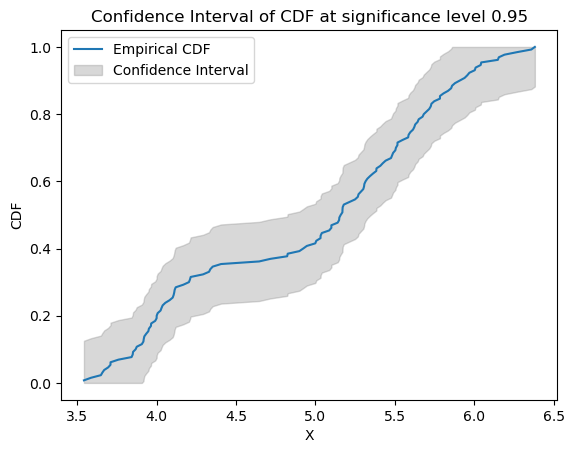

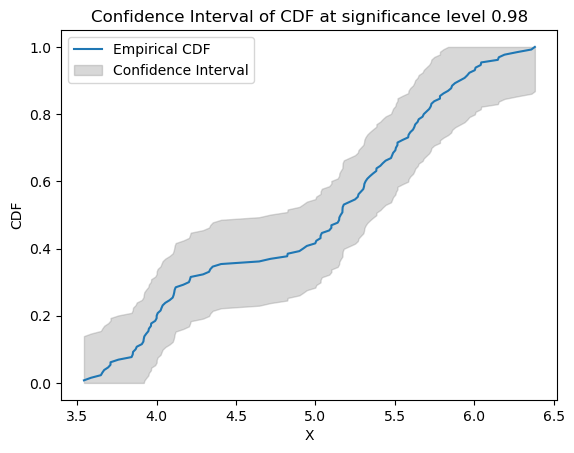

In [118]:
# Komórka testowa
test_results_3 = cdf_estimation(sample, 0.05)
assert type(test_results_3) == pd.DataFrame
assert test_results_3.shape == (130, 4)
assert list(test_results_3.columns) == ['X', 'F_d', 'F_d_min', 'F_d_max']
assert np.all(np.isclose(test_results_3.min().values, [3.54233698, 0.00769231, 0., 0.12544548]))
assert np.all(np.isclose(test_results_3.max().values, [6.38176057, 1., 0.88224683, 1.]))
assert np.all(np.isclose(test_results_3.mean().values, [4.9551826 , 0.50384615, 0.3925793 , 0.61420722]))

test_results_4 = cdf_estimation(sample, 0.02)
assert type(test_results_4) == pd.DataFrame
assert test_results_4.shape == (130, 4)
assert list(test_results_4.columns) == ['X', 'F_d', 'F_d_min', 'F_d_max']
assert np.all(np.isclose(test_results_4.min().values, [3.54233698, 0.00769231, 0., 0.13935689]))
assert np.all(np.isclose(test_results_4.max().values, [6.38176057, 1., 0.86833542, 1.]))
assert np.all(np.isclose(test_results_4.mean().values, [4.9551826 , 0.50384615, 0.380346, 0.62633351]))